The Lotka-Volterra equations are an important pair of ODEs in ecology that seek to model the predator=prey interaction.

Suppose that we have two species, of which one is the predator, and the other is the prey. Let us denote $x$ as the number of prey and $y$ as the number of predators. The two equations are as follows:

$\frac{dx}{dt} = \alpha x - \beta xy$

$\frac{dy}{dt} = \delta xy - \gamma y$

How are these equations generated?

When Volterra was coming up with a model of two fish populations in the Adriatic Sea, he made a number of assumptions. The fundamental two ideas that lead to the direct formation of the equations are that:

1. Given that there are zero predators, the per capita prey growth rate ($\frac{1}{x}\frac{dx}{dt} = \alpha$), and additionally as the number of predators increases from this, the per capita growth rate should fall linearly. 

2. The same logic holds for when there are zero prey, etc.

This assumes a number of other things about the predator-prey relationship, including:

1. The prey have an unlimited food supply, such that the only part of the food chain that affects them is their predators.

2. Predators have an unlimited appetite, and their food supply depends completely on the prey population.

3. There is no change in environmental factors (be it biotic or abiotic) such that one species here is suddenly favoured. Similarly, there is no significant genetic drift to favour one species. 

These equations may seem somewhat reductive and niche, but as a matter of fact they have been extended to model interactions in economics, epidemiology, and chemistry (Lotka derived the equations independently of Volterra when modelling an oscillating chemical reaction).

For a famous example of the Lotka-Volterra equations in practice, look up the interaction of wolves and moose on Isle Royale, US.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
from scipy import integrate

In [11]:
def Lotka_Volterra(y, t, a,b,c,d):
    U,V = y
    
    dU_dt = a*U - b*U*V
    dV_dt = -c*V + d*U*V

    return [dU_dt, dV_dt]

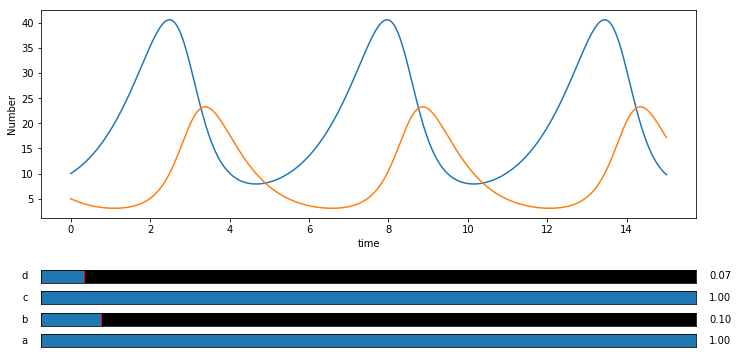

In [20]:
U0 = 10 # prey
V0 = 5 # predator

a = 1.0
b = 0.1
c = 1.5
d = 0.075

t = np.linspace(0,15, 1000)

fig, ax = plt.subplots(figsize=(14,6))
plt.subplots_adjust(left=0.25, bottom=0.4)

l1, l2 = plt.plot(t, integrate.odeint(Lotka_Volterra, [U0, V0], t, args=(a,b,c,d)))

axcolor = 'black'
ax_a = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
ax_b = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
ax_c = plt.axes([0.25, 0.2, 0.65, 0.03], facecolor=axcolor)
ax_d = plt.axes([0.25, 0.25, 0.65, 0.03], facecolor=axcolor)

sa = Slider(ax_a, 'a', 0.01, 1, valinit=a)
sb = Slider(ax_b, 'b', 0.01, 1, valinit=b)
sc = Slider(ax_c, 'c', 0.01, 1, valinit=c)
sd = Slider(ax_d, 'd', 0.01, 1, valinit=d)

def update(val):
    a = sa.val
    b = sb.val
    c = sc.val
    d = sd.val
    y = integrate.odeint(Lotka_Volterra, [U0,V0], t, (a,b,c,d))
    l1.set_ydata(y[:,0])
    l2.set_ydata(y[:,1])
    fig.canvas.draw_idle()

sa.on_changed(update)
sb.on_changed(update)
sc.on_changed(update)
sd.on_changed(update)

ax.set(xlabel='time', ylabel='Number')
plt.show()

In [15]:
X_f0 = np.array([     0. ,  0.])
X_f1 = np.array([ c/(d*b), a/b])

def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return np.array([ a*X[0] -   b*X[0]*X[1] ,
                  -c*X[1] + d*b*X[0]*X[1] ])

(0, 36.877474535559266)

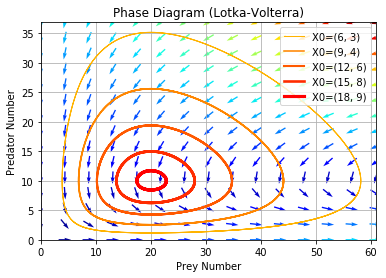

In [21]:
# Credit to https://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html
# for help with constructing the phase diagram

values  = np.linspace(0.3, 0.9, 5)                          # position of X0 between X_f0 and X_f1
vcolors = plt.cm.autumn_r(np.linspace(0.3, 1., len(values)))  # colors for each trajectory

#-------------------------------------------------------
# plot trajectories
for v, col in zip(values, vcolors):
    X0 = v * np.array([c/d, a/b])       # starting point
    #X = integrate.odeint(dX_dt, X0, t) 
    X = integrate.odeint(Lotka_Volterra, X0, t, args=(a,b,c,d))
    plt.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )

#-------------------------------------------------------
# define a grid and compute direction at each point
ymax = plt.ylim(ymin=0)[1]                        # get axis limits
xmax = plt.xlim(xmin=0)[1]
nb_points = 15

x = np.linspace(0, xmax, nb_points)
y = np.linspace(0, ymax, nb_points)

X1 , Y1  = np.meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dt([X1, Y1])                      # compute growth rate on the gridt
M = (np.hypot(DX1, DY1))                           # Norm of the growth rate 
M[M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M

plt.title('Phase Diagram (Lotka-Volterra)')
Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=plt.cm.jet)
plt.xlabel('Prey Number')
plt.ylabel('Predator Number')
plt.legend()
plt.grid()
plt.xlim(0, xmax)
plt.ylim(0, ymax)

This phase diagram shows us the interesting consequences of the Lotka-Volterra equations. If we wished to decrease the prey population, introducting the predator is not a good idea in the long run because depending on the time of intervention it might actually increase the prey population size. 

Let us consider more of the mathematics behind the Lotka-Volterra equations:

Let's try and find the fixed points of the Lotka-Volterra equations; that is, the points where the population of both the predators and the prey are not changing. This occurs when $\frac{dx}{dt} = 0$ and $\frac{dy}{dt} = 0$. Therefore:

$\alpha x - \beta xy = 0$

$\delta xy - \gamma y = 0$

Solving these two equations yields two equilibria points:

{$x=0, y=0$} , {$x = \frac{\gamma}{\delta}, y=\frac{\alpha}{\beta}$}

The first solution occurs when both populations are extinct, which obviously means that there can be no further change in the two populations, so this makes intuitive sense. Let us analyse these stable points further. 

The Jacobian matrix of a multivariable function describes the gradient of a scalar-valued function in several variables. In other words, if you have a space that is transformed by a function, the Jacobian matrix describes the local transformation caused by that function about each point. Whether this makes sense to you or not at this stage, the Jacobian matrix is useful because it can help us to determine the stability of a fixed point.

The Jacobian matrix has the general form:

$$\mathbf{J} = \begin{bmatrix} \frac{\partial f_1}{\partial x_1} & \dots & \frac{\partial f_1}{\partial x_n} \\ \vdots &  & \vdots \\ \frac{\partial f_m}{\partial x_1} & \dots & \frac{\partial f_m}{\partial x_n} \end{bmatrix}$$

As such, the Jacobin for the Lotka-Volterra equations is:

$$\begin{bmatrix} \alpha - \beta y & -\beta x \\ \delta y & \delta x - \gamma \end{bmatrix}$$

From this:

$$\mathbf{J}(0,0) = \begin{bmatrix} \alpha & 0 \\ 0 & -\gamma \end{bmatrix}$$

This yields eigenvalues of $\lambda_1 = \alpha, \lambda_2 = -\gamma$. Given that all parameters $\alpha, \beta, \gamma, \delta > 0$, then we can see that $\lambda_1$ and $\lambda_2$ shall always have different signs. As a result, this fixed point is a saddle point, which means it is unstable. This means extinction is difficult to reach in this model. One can think of this intuitively. If the predators go extinct, then given that the prey had an unlimited food source as per our assumptions above, the prey will grow infinitely. The only manner in which extinction occurs is if the prey go extinct first,  and then the predators will starve to extinction.

Now for the second fixed point:

$$\mathbf{J}(\frac{\gamma}{\delta}, \frac{\alpha}{\beta}) = \begin{bmatrix} 0 & -\frac{\beta \gamma}{\delta} \\ \frac{\alpha \delta}{\beta} & 0 \end{bmatrix}$$

This yields eigenvalues $\lambda = \pm i \sqrt{\alpha \gamma}$. As these eigenvalues are both conjugate and imaginary, the fixed point is elliptic. This means that the solutions are periodic.

